In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def get_dataset(n_features=2, n_samples=100, sigma_y = 2, true_beta = np.array([-1,1]), A=np.array([[1, 0],[-1, 2]]), seed=42):
    np.random.seed(seed)

    Sigma = A@A.T 

    X = np.random.randn(n_features, n_samples)
    X = A@X 

    epsilon_y = np.random.randn(n_samples)*sigma_y
    y = X.T @ true_beta +epsilon_y


    return X, y, epsilon_y

      


In [170]:
n_features=5
n_train_samples=10
n_test_samples=1000
sigma_y = 2
# noise = .1
# A = np.array([[1, 0],[-1, noise]])
A = np.diag([1, 2, 3, 0.1, 00.1])
true_beta = np.array([-1,1,1,-1, 1])


error_mean = []
error_ols = []
error_ridge = []


for seed in range(1000):
    X_train, y_train, epsilon_y_train = get_dataset(n_features=n_features, n_samples=n_train_samples, sigma_y = sigma_y,true_beta = true_beta, A=A, seed=seed)
    betaols = np.linalg.inv(X_train@X_train.T)@X_train@y_train



    from scipy.optimize import minimize



    def f(k):
        err= 0
        for i in range(n_train_samples):

            X_train_ridge = np.delete(X_train, i, axis = 1) 
            X_val_ridge = X_train[:,i]

            y_train_ridge = np.delete(y_train, i)
            y_val_ridge = y_train[i]

            betak = np.linalg.inv(X_train_ridge@X_train_ridge.T+k*np.eye(n_features))@X_train_ridge@y_train_ridge
            err+=np.sum((y_val_ridge - X_val_ridge.T@betak)**2)
        return err


    res = minimize(f,x0=0, method='Nelder-Mead', bounds=[(0, np.inf)])
    k = res.x
    # print(k)
    betaridge = np.linalg.inv(X_train@X_train.T+k*np.eye(n_features))@X_train@y_train
    # print(betaridge)
    # print(betaols)
    # print()
    X_test, y_test, epsilon_y_test = get_dataset(n_features=n_features, n_samples=n_test_samples, sigma_y = sigma_y,true_beta = true_beta, A=A, seed=seed+1)

    error_mean.append(np.mean((y_test-np.mean(y_train))**2))
    error_ols.append(np.mean((y_test - X_test.T@betaols)**2))
    error_ridge.append(np.mean((y_test - X_test.T@betaridge)**2))



print(f"ridge : {np.mean(error_ridge)}")
print(f"ols : {np.mean(error_ols)}")
print(f"mean : {np.mean(error_mean)}")
print()



ridge : 6.805252832080398
ols : 8.762834602950765
mean : 19.88651184899566



In [ ]:
from scipy.optimize import minimize_scalar

def f(k):
    return (x - 2)**2  # minimum at x=2

res = minimize_scalar(f, method='golden')
print(res.x, res.fun)

1.9999999999999998 4.930380657631324e-32


In [70]:

n_features=2
n_train_samples=5
n_test_samples=5
sigma_y = 2
noise = 0.5
A = np.array([[1, 0],[-1, noise]])

true_beta = np.array([-1,1])

for seed in [42]:

    X, y, epsilon_y = get_dataset(n_features=n_features, n_samples=n_train_samples, sigma_y = sigma_y,true_beta = true_beta, A=A, seed=seed)
    list_X_test, list_y_test, list_epsilon_y_test =  get_dataset(n_features=n_features, n_samples=n_test_samples, sigma_y = sigma_y,true_beta = true_beta, A=A, seed=seed+1)
    list_err_tot = []
    list_err_ols = []
    list_betak_dot_err_beta = []


    for i in range(n_test_samples):

        X_test, y_test, epsilon_y_test = list_X_test[::, i:i+1], list_y_test[i:i+1], list_epsilon_y_test[i:i+1]

        k = 1.4
        betak = np.linalg.inv(X@X.T +k*np.eye(2))@X@y
        betaols = np.linalg.inv(X@X.T)@(X@y)
        epsilon_beta_ols_train = np.linalg.inv(X@X.T)@(X@epsilon_y)

        # print(np.linalg.norm(y_test-X_test.T@betak)**2)
        # print(np.linalg.norm(X_test.T@betaols-X_test.T@epsilon_beta_ols_train+epsilon_y_test-X_test.T@betak)**2)



        norm_beta_diff = (betak-betaols).T@X_test@X_test.T@(betak-betaols)
        beta_diff_dot_err_beta = (betak-betaols).T@X_test@X_test.T@epsilon_beta_ols_train
        beta_diff_dot_err_test =  (betak-betaols).T@X_test@epsilon_y_test

        
        err_ols = epsilon_beta_ols_train.T@X_test@X_test.T@epsilon_beta_ols_train - 2*epsilon_beta_ols_train.T@X_test@epsilon_y_test + epsilon_y_test@epsilon_y_test.T
        err = err_ols + norm_beta_diff + beta_diff_dot_err_beta + beta_diff_dot_err_test

        list_betak_dot_err_beta.append((betak-betaols).T@X_test@X_test.T@epsilon_beta_ols_train)

        list_err_tot.append(err)
        list_err_ols.append(err_ols)
        # print(err)
  
    # print(np.mean(list_err_tot))
    # print(np.mean(list_err_ols))
    # print(np.mean(list_betak_dot_err_beta))

    X_o = np.concatenate([X.T, list_X_test.T]).T
    y_o = np.concatenate([y.T, list_y_test.T]).T

    beta_ols = np.linalg.inv(X_o@X_o.T)@X_o@y_o
    X_test, y_test, epsilon_y_test =  get_dataset(n_features=n_features, n_samples=100, sigma_y = sigma_y,true_beta = true_beta, A=A, seed=seed+2)

    print(np.sum((y_test - X_test.T@beta_ols)**2))
    print(np.sum((y_test - X_test.T@betak)**2))



805.0447413090378
425.7536812594786


In [78]:

n_features=2
n_train_samples=5
n_test_samples=5
sigma_y = 2
noise = 0.5
A = np.eye(2)
# np.array([[1, 0],[-1, noise]])

true_beta = np.array([[1, 0],[-1, noise]])@np.array([-1,1])

for seed in [42]:

    X, y, epsilon_y = get_dataset(n_features=n_features, n_samples=n_train_samples, sigma_y = sigma_y,true_beta = true_beta, A=A, seed=seed)
    list_X_test, list_y_test, list_epsilon_y_test =  get_dataset(n_features=n_features, n_samples=n_test_samples, sigma_y = sigma_y,true_beta = true_beta, A=A, seed=seed+1)
    list_err_tot = []
    list_err_ols = []
    list_betak_dot_err_beta = []


    for i in range(n_test_samples):

        X_test, y_test, epsilon_y_test = list_X_test[::, i:i+1], list_y_test[i:i+1], list_epsilon_y_test[i:i+1]

        k = 1.4
        betak = np.linalg.inv(X@X.T +k*np.eye(2))@X@y
        betaols = np.linalg.inv(X@X.T)@(X@y)
        epsilon_beta_ols_train = np.linalg.inv(X@X.T)@(X@epsilon_y)

        # print(np.linalg.norm(y_test-X_test.T@betak)**2)
        # print(np.linalg.norm(X_test.T@betaols-X_test.T@epsilon_beta_ols_train+epsilon_y_test-X_test.T@betak)**2)



        norm_beta_diff = (betak-betaols).T@X_test@X_test.T@(betak-betaols)
        beta_diff_dot_err_beta = (betak-betaols).T@X_test@X_test.T@epsilon_beta_ols_train
        beta_diff_dot_err_test =  (betak-betaols).T@X_test@epsilon_y_test

        
        err_ols = epsilon_beta_ols_train.T@X_test@X_test.T@epsilon_beta_ols_train - 2*epsilon_beta_ols_train.T@X_test@epsilon_y_test + epsilon_y_test@epsilon_y_test.T
        err = err_ols + norm_beta_diff + beta_diff_dot_err_beta + beta_diff_dot_err_test

        list_betak_dot_err_beta.append((betak-betaols).T@X_test@X_test.T@epsilon_beta_ols_train)

        list_err_tot.append(err)
        list_err_ols.append(err_ols)
        # print(err)
  
    # print(np.mean(list_err_tot))
    # print(np.mean(list_err_ols))
    # print(np.mean(list_betak_dot_err_beta))

    X_o = np.concatenate([X.T, list_X_test.T]).T
    y_o = np.concatenate([y.T, list_y_test.T]).T

    beta_ols = np.linalg.inv(X_o@X_o.T)@X_o@y_o
    X_test, y_test, epsilon_y_test =  get_dataset(n_features=n_features, n_samples=100, sigma_y = sigma_y,true_beta = true_beta, A=A, seed=seed+2)

    print(np.sum((y_test - X_test.T@beta_ols)**2))
    print(np.sum((y_test - X_test.T@betak)**2))



805.0447413090369
526.2189826443523


In [17]:


# test Benoit Legat
X_train, y_train, epsilon_y_train  =  get_dataset(n_features=2, n_samples=100, sigma_y = 2, true_beta = np.array([-1,1]), A=np.array([[1, 0],[-1, 2]]), seed=42)
X_test, y_test, epsilon_y_test  =  get_dataset(n_features=2, n_samples=1000, sigma_y = 2, true_beta = np.array([-1,1]), A=np.array([[1, 0],[-1, 2]]), seed=43)

beta_ols = np.linalg.inv(X_train@X_train.T)@X_train@y_train


for k in [0, 0.5, 1, 2]:
    sum_errors = 0
    beta_k = np.linalg.inv(X_train@X_train.T+k*np.eye(2))@X_train@y_train


    for i in range(100):
        np.random.seed(i)
        epsilon_y = np.random.randn(100)*2
        true_beta_f = betaols -np.linalg.inv(X_train@X_train.T)@X_train@epsilon_y
        for j in range(100):
            epsilon_y = np.random.randn(1000)*2
            y_test_f = X_test.T@true_beta_f
            k = 1
            sum_errors += np.sum((X_test.T@beta_k-y_test_f)**2)


    print(sum_errors)





        



11017874.017208379
11085678.116715543
11153031.775688307
11286425.603028696


In [ ]:

import pandas as pd
import seaborn as sns

# Step 1: Create a DataFrame from the tuples
df = pd.DataFrame({'x': x+betahat[0], 'y': y+betahat[1], 'w': w})

# Step 2: Pivot the DataFrame to get a matrix suitable for a heatmap
heatmap_data = df.pivot(index='y', columns='x', values='w')

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=False,  cbar=True)
plt.title("Heatmap of w over (x, y)")
plt.xlabel("x")
plt.ylabel("y")

plt.show()



err = [np.sum((X_test@(betahat+np.array(i,j)) - y_test)**2) for i, j in zip(x,y)]


# Step 1: Create a DataFrame from the tuples
df = pd.DataFrame({'x': x+betahat[0], 'y': y+betahat[1], 'w': err})



# Step 2: Pivot the DataFrame to get a matrix suitable for a heatmap
heatmap_data = df.pivot(index='y', columns='x', values='w')

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=False,  cbar=True, vmax=200)
plt.title("Heatmap of w over (x, y)")
plt.xlabel("x")
plt.ylabel("y")

plt.show()




NameError: name 'pd' is not defined

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

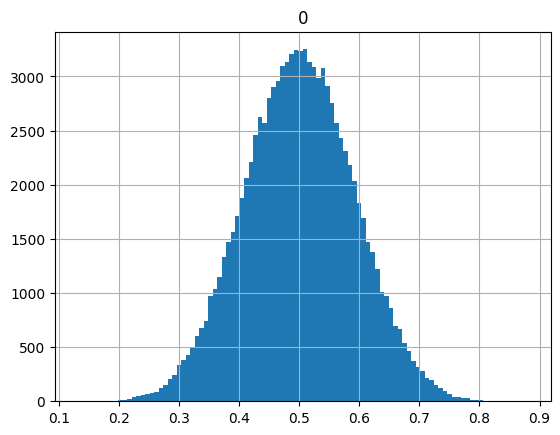

In [21]:
import numpy as np
import pandas as pd

n = 10


mean_list = np.mean(np.random.uniform(0, 1, (n, 100000)), axis= 0)

mean_list = pd.DataFrame(mean_list)
mean_list.hist(bins=100)
